In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=14)
%matplotlib inline
from statsmodels.api import Logit, add_constant
import statsmodels.formula.api as smf
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, auc)
from pandas import Series, DataFrame

In [2]:
#Read in prepared csv file
log_mdf=pd.read_csv('/Users/robertpatton/Desktop/D208_task2_clean.csv', index_col=0)

In [3]:
#Examine data info
log_mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ReAdmis                 10000 non-null  int64  
 1   Children                10000 non-null  int64  
 2   Age                     10000 non-null  int64  
 3   Income                  10000 non-null  float64
 4   VitD_levels             10000 non-null  float64
 5   Doc_visits              10000 non-null  int64  
 6   vitD_supp               10000 non-null  int64  
 7   HighBlood               10000 non-null  int64  
 8   Stroke                  10000 non-null  int64  
 9   Overweight              10000 non-null  int64  
 10  Arthritis               10000 non-null  int64  
 11  Diabetes                10000 non-null  int64  
 12  Hyperlipidemia          10000 non-null  int64  
 13  BackPain                10000 non-null  int64  
 14  Anxiety                 10000 non-null 

In [4]:
#Classify our X variables for logistic regression
X= log_mdf.drop(columns='ReAdmis')
X

,Children,Age,Income,VitD_levels,Doc_visits,vitD_supp,HighBlood,Stroke,Overweight,Arthritis,...,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,_Emergency Admission,_Observation Admission,Risk_Low,Risk_Medium,_Male,_Nonbinary
0,1,53,86575.93,19.141466,6,0,1,0,0,1,...,1,0,1,10.585770,1,0,0,1,1,0
1,3,51,46805.99,18.940352,4,1,1,0,1,0,...,0,1,0,15.129562,1,0,0,0,0,0
2,3,53,14370.14,18.057507,4,0,1,0,1,0,...,0,0,0,4.772177,0,0,0,1,0,0
3,0,78,39741.49,16.576858,4,0,0,1,0,1,...,0,1,1,1.714879,0,0,0,1,1,0
4,1,22,1209.56,17.439069,5,2,0,0,0,0,...,1,0,0,1.254807,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,25,45967.61,16.980860,4,1,1,0,0,0,...,0,1,0,51.561220,1,0,0,1,1,0
9996,4,87,14983.02,18.177020,5,0,1,0,1,1,...,0,0,1,68.668240,0,0,0,1,1,0
9997,3,45,65917.81,17.129070,4,0,1,0,1,0,...,1,0,0,70.154180,0,0,0,0,0,0
9998,3,43,29702.32,19.910430,5,1,0,0,1,0,...,0,0,0,63.356900,1,0,0,1,1,0


In [5]:
#Classify our y variable for logistic regression
y= log_mdf['ReAdmis']
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    1
9997    1
9998    1
9999    1
Name: ReAdmis, Length: 10000, dtype: int64

In [6]:
#Split the data set into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=444)

In [7]:
#Create an intitial logistic model and confusion matrix
X_train_with_const = add_constant(X_train)
LR1 = Logit(y_train, X_train_with_const).fit()
LR1.summary()

Optimization terminated successfully.
         Current function value: 0.034625
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6975
Method:                           MLE   Df Model:                           24
Date:                Wed, 10 Jan 2024   Pseudo R-squ.:                  0.9474
Time:                        10:57:30   Log-Likelihood:                -242.38
converged:                       True   LL-Null:                       -4607.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -74.2420      4.893    -15.172      0.000     -83.833     -64.651
Children                   0.1668      0.057      2.929      0.003       0.055       0.278
Age                        0.0037      0.006      0.631      0.528      -0.008       0.015
Income                  3.221e-06   4.16e-06      0.775      0.438   -4.92e-06    1.14e-05
VitD_levels                0.0388      0.056      0.691      0.489      -0.071       0.149
Doc_visits                 0.0176      0.113      0.155      0.877      -0.205       0.240
vitD_supp                 -0.1671      0.195     -0.856      0.392      -0.550       0.216
HighBlood                  0.9691      0.261      3.714      0.000       0.458       1.481
Stroke                     1.4561      0.307      4.740      0.000       0.854       2.058
Overweight                -0.3000      0.265     -1.132      0.257      -0.819       0.219
Arthritis                 -1.0492      0.260     -4.038      0.000      -1.558      -0.540
Diabetes                   0.5070      0.270      1.879      0.060      -0.022       1.036
Hyperlipidemia             0.3684      0.254      1.448      0.148      -0.130       0.867
BackPain                   0.4559      0.246      1.852      0.064      -0.027       0.938
Anxiety                   -1.0911      0.268     -4.076      0.000      -1.616      -0.566
Allergic_rhinitis         -0.3794      0.245     -1.548      0.122      -0.860       0.101
Reflux_esophagitis        -0.4260      0.251     -1.699      0.089      -0.917       0.065
Asthma                    -1.1738      0.275     -4.273      0.000      -1.712      -0.635
Initial_days               1.3357      0.087     15.319      0.000       1.165       1.507
_Emergency Admission       2.1295      0.321      6.642      0.000       1.501       2.758
_Observation Admission     0.6864      0.337      2.040      0.041       0.027       1.346
Risk_Low                  -1.3770      0.336     -4.102      0.000      -2.035      -0.719
Risk_Medium               -0.3639      0.271     -1.341      0.180      -0.896       0.168
_Male                      0.1835      0.244      0.753      0.451      -0.294       0.661
_Nonbinary                 0.2325      0.692      0.336      0.737      -1.123       1.588
==========================================================================================

Possibly complete quasi-separation: A fraction 0.81 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

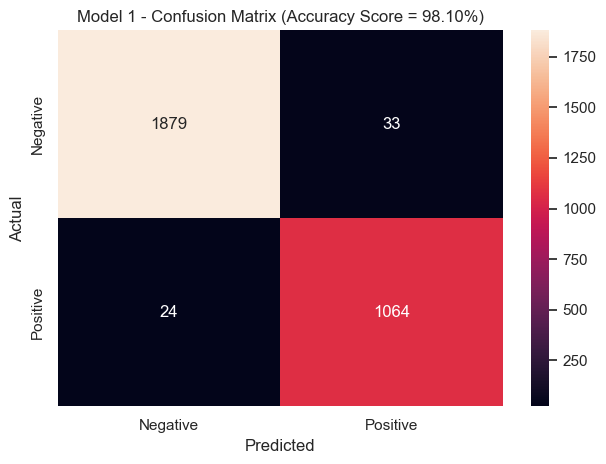

In [8]:
#Construct confusion matrix and determine accuracy of predicting ReAdmis
X_test_with_const = add_constant(X_test)
y_pred = np.where(LR1.predict(X_test_with_const) > 0.5, 1, 0)
# Accuracy predication are (True Positives + True Negatives) / Total Predictions
score = accuracy_score(y_test, y_pred) 
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title(f"Model 1 - Confusion Matrix (Accuracy Score = {score * 100:.2f}%)")
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

In [9]:
#Get classification report for model performance
print("Model 1:")
print(f"Recall (Sensitivity): {recall_score(y_test, y_pred)* 100:.2f}%")
print(f"Specificity: {recall_score(y_test, y_pred, pos_label=0) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred) * 100: .2f}%")

Model 1:
Recall (Sensitivity): 97.79%
Specificity: 98.27%
Precision:  96.99%


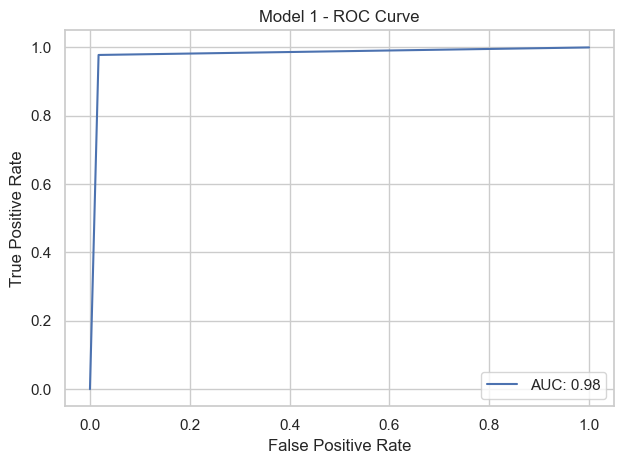

In [10]:
#Examine ROC curve and determine AUC for initial model performance
fpr, tpr, _ = roc_curve(y_test, y_pred)
ax = sns.lineplot(x=fpr, y=tpr, label=f"AUC: {auc(fpr, tpr):.2f}")
plt.title("Model 1 - ROC Curve")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
plt.tight_layout()
plt.show()

In [11]:
#Implement backwards stepwise feature selection to reduce the model
def backward_eliminator(
    estimator, training_X, testing_X, training_y, testing_y, 
    n_features=1, threshold=0.05, recall_thresh=0.95):
    remaining_features = training_X.shape[1]
    reduced_features = training_X.columns
    recall = 0
    while remaining_features > n_features:
        # Fit the model
        X_train_const = add_constant(training_X[reduced_features])
        X_test_const = add_constant(testing_X[reduced_features])
        model = estimator(training_y, X_train_const).fit()
        # Calculate recall
        y_pred = np.where(model.predict(X_test_const) > 0.5, 1, 0)
        recall = recall_score(testing_y, y_pred)
        # Remove the feature with the highest p-value
        max_pval = model.pvalues.max()
        if max_pval >= threshold:
            to_remove = [model.pvalues.idxmax(), "const"]
            reduced_features = [
                col for col in model.pvalues.index 
                if col not in to_remove]
        term_conditions = [
            len(reduced_features) == remaining_features,
            recall < recall_thresh
        ]
        if any(term_conditions):
            print("Terminating condition met")
            break
        print(f"Total features: {len(reduced_features)} | Recall: {recall}")
        remaining_features -= 1

    return reduced_features, recall

In [12]:
#Execute elimination of variables with highest p-values
reduced_features, recall = backward_eliminator(Logit,X_train, X_test, y_train, y_test)

print(f"Estimated recall from reduced feature set: {recall}")

Optimization terminated successfully.
         Current function value: 0.034625
         Iterations 14
Total features: 23 | Recall: 0.9779411764705882
Optimization terminated successfully.
         Current function value: 0.034627
         Iterations 14
Total features: 22 | Recall: 0.9779411764705882
Optimization terminated successfully.
         Current function value: 0.034636
         Iterations 14
Total features: 21 | Recall: 0.9779411764705882
Optimization terminated successfully.
         Current function value: 0.034663
         Iterations 14
Total features: 20 | Recall: 0.9797794117647058
Optimization terminated successfully.
         Current function value: 0.034696
         Iterations 14
Total features: 19 | Recall: 0.9779411764705882
Optimization terminated successfully.
         Current function value: 0.034728
         Iterations 14
Total features: 18 | Recall: 0.9779411764705882
Optimization terminated successfully.
         Current function value: 0.034766
         Itera

In [13]:
# Create reduced model logistic regression
X_train_red_const = add_constant(X_train[reduced_features])
LR2 = Logit(y_train, X_train_red_const).fit()
LR2.summary()

Optimization terminated successfully.
         Current function value: 0.036019
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6989
Method:                           MLE   Df Model:                           10
Date:                Wed, 10 Jan 2024   Pseudo R-squ.:                  0.9453
Time:                        10:57:31   Log-Likelihood:                -252.13
converged:                       True   LL-Null:                       -4607.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -71.3580      4.556    -15.662      0.000     -80.288     -62.428
Children                   0.1575      0.054      2.908      0.004       0.051       0.264
HighBlood                  0.8784      0.248      3.547      0.000       0.393       1.364
Stroke                     1.2709      0.289      4.392      0.000       0.704       1.838
Arthritis                 -0.9698      0.249     -3.896      0.000      -1.458      -0.482
Anxiety                   -1.0183      0.255     -3.989      0.000      -1.519      -0.518
Asthma                    -1.1437      0.269     -4.245      0.000      -1.672      -0.616
Initial_days               1.3000      0.083     15.669      0.000       1.137       1.463
_Emergency Admission       2.0228      0.301      6.719      0.000       1.433       2.613
_Observation Admission     0.6939      0.322      2.154      0.031       0.063       1.325
Risk_Low                  -1.1461      0.290     -3.957      0.000      -1.714      -0.579
==========================================================================================

Possibly complete quasi-separation: A fraction 0.80 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

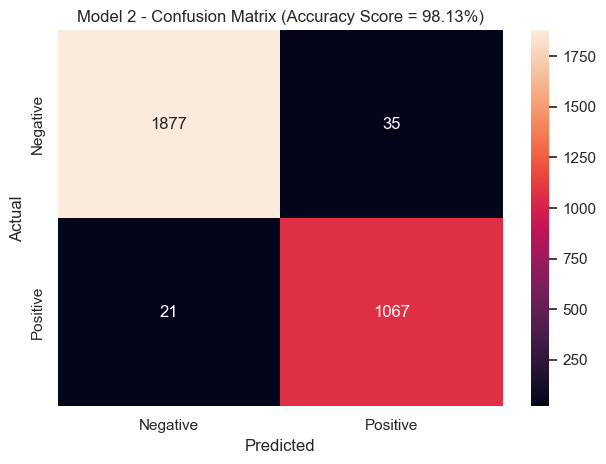

In [14]:
#Construct confusion matrix and determine accuracy of reduced model
X_test_red_const = add_constant(X_test[reduced_features])
y_pred_red = np.where(LR2.predict(X_test_red_const) >= 0.5, 1, 0)
score = accuracy_score(y_test, y_pred_red)
ax = sns.heatmap(confusion_matrix(y_test, y_pred_red), annot=True, fmt="d")
ax.set_title(f"Model 2 - Confusion Matrix (Accuracy Score = {score * 100:.2f}%)")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.tight_layout()
plt.show()

In [15]:
#Classification report for reduced model
print(f"Recall Score: {recall_score(y_test, y_pred_red) * 100:.2f}%")
print(f"Precision Score: {precision_score(y_test, y_pred_red) * 100:.2f}%")
print(f"Specificity Score: {recall_score(y_test, y_pred_red, pos_label=0) * 100 :.2f}%")

Recall Score: 98.07%
Precision Score: 96.82%
Specificity Score: 98.17%


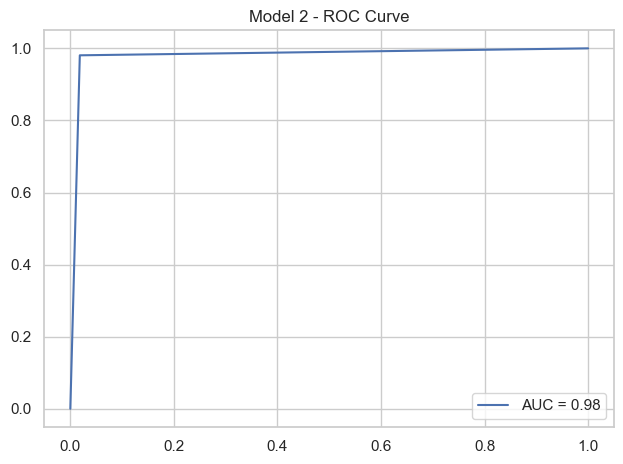

In [16]:
#Create ROC curve and AUC for reduced model performance
fpr2, tpr2, _ = roc_curve(y_test, y_pred_red)
roc_auc2 = auc(fpr2, tpr2)

ax = sns.lineplot(x=fpr2, y=tpr2, label=f"AUC = {roc_auc2:.2f}")
ax.set_title("Model 2 - ROC Curve")
plt.tight_layout()
plt.show()

In [17]:
#Create visual comparisson between initial and reduced models
metrics = {
    "recall": [.9779, .9807],
    "precision": [.9699, .9682],
    "accuracy": [.9810, .9813],
    "specificity": [.9827, .9817],
    "auc": [.98, .98]
}

model_metrics = pd.DataFrame(metrics, index=["Model 1", "Model 2"])
model_metrics

,recall,precision,accuracy,specificity,auc
Model 1,0.9779,0.9699,0.9810,0.9827,0.98
Model 2,0.9807,0.9682,0.9813,0.9817,0.98


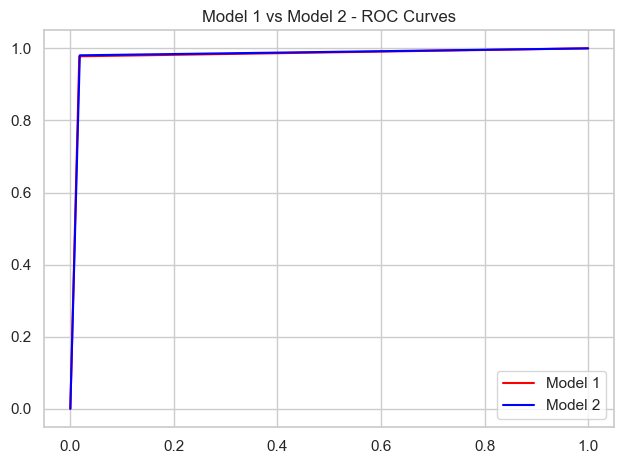

In [18]:
#Create ROC curve comparing intial model AUC and reduced model AUC
mod1_ax = sns.lineplot(x=fpr, y=tpr, label="Model 1", color="red")
mod2_ax = sns.lineplot(x=fpr2, y=tpr2, label="Model 2", color="blue")
plt.title("Model 1 vs Model 2 - ROC Curves")
plt.tight_layout()
plt.show()